In [14]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import json
import os
from argoverse.map_representation.map_api import ArgoverseMap

am = ArgoverseMap() # 여기는 지도를 그리기 위한 API로 https://github.com/argoai/argoverse-api 를 참조하여 api를 설치하신 후에 사용 가능합니다.



In [17]:

# index = 0
# json_dict = {}
# with open(root_dir + file_list[index]) as json_data:
#     json_dict = json.load(json_data)

# preds = np.array(json_dict['preds'])
# waypoint_preds = np.array(json_dict['waypoint_preds'])
# agent_labels = np.array(json_dict['agent_labels'])

# maximum_num = -1
# minimum_num = 999999
# for index in tqdm(range(len(file_list))): # 전체를 다 그리기는 힘드므로 일부만 시각화

#     json_dict = {}

#     with open(root_dir + file_list[index], 'r') as json_data:
#         json_dict = json.load(json_data)
#     print(json_dict.keys())
#     maximum_num = max(maximum_num, np.max(np.max(json_dict["graph_weight"], axis=-1)))
#     minimum_num = min(minimum_num, np.min(np.min(json_dict["graph_weight"], axis=-1)))
    

In [51]:
import torch
import math
from shapely.geometry import LineString

def denormalization(arr, angle, translation_x, translation_y): # 테스트 결과근 normalize되서 나오므로 이를 다시 denormalization 시키는 코드

    theta = (angle)/180*math.pi
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))

    #rotate
    arr = np.array([R.dot(arr[...,:2][i].reshape((2,1))).flatten() for i in range(len(arr[...,:2]))])

    #translate
    arr[...,0] += translation_x
    arr[...,1] += translation_y
#     arr[...,0] += (AGENT[19,0] - AGENT[0,0])
#     arr[...,1] += (AGENT[19,1] - AGENT[0,1])
    return arr


def draw(AGENT, AVs, json_dict,graph_weight = None, head_num = 0, figsize = (8,8), Normalize = False, title = None):

    plt.ion()
    plt.figure(figsize=figsize)
    if title != None:
        plt.title(title)

    

    
    x_mean = np.array(json_dict['preds'])[0,:,0,0].mean()
    y_mean = np.array(json_dict['preds'])[0,:,0,1].mean()

    angle_ans = -json_dict['rotation']

    xmin, xmax, ymin,ymax = [9999], [-9999], [9999], [-9999]

    json_dict['preds'] = [[np.array(json_dict['preds'])[0][i] - json_dict['preds'][0][i][:1] for i in range(len(json_dict['preds'][0]))]]    # calculate x's mean and y's mean in predict

    
    for p in json_dict['preds'][0]:
        p = denormalization(np.array(p), angle_ans, -json_dict['translation'][0], -json_dict['translation'][1])
        p += AGENT[-1] - AGENT[0]
        plt.plot(p[...,0], p[...,1], linestyle='dashed', alpha = 0.5, zorder = -1)
        plt.scatter(p[...,0][-1], p[...,1][-1], linewidth=2, alpha = 0.5, zorder = -1)
        xmin, xmax = min(np.append(xmin, p[...,0])), max(np.append(xmax, p[...,0]))
        ymin, ymax = min(np.append(ymin, p[...,1])), max(np.append(ymax, p[...,1]))
        

    plt.plot(AGENT[...,0],AGENT[...,1], color='blue')
    plt.scatter(AGENT[...,0][-1],AGENT[...,1][-1], color='blue',linewidth=8)
    plt.scatter(AGENT[...,0][19],AGENT[...,1][19], color='blue')

#     print(graph_weight[3][0])
#     graph_weight[3][0] = graph_weight[3][0] / max(max(graph_weight[3][0]), 0.00001)
    
    
    for i, AV in enumerate(AVs):
        
        if AGENT[:,0][0] != AVs[i][:,0][0]: # 간혹 AV의 trajectory가 0으로 초기화 되어 있는 경우가 있는데 이 경우 AGENT의 초기값과 같아져 발생하는 오류때문에 넣어줌
            plt.plot(AV[...,0],AV[...,1], color='black')
            plt.scatter(AV[...,0][-1],AV[...,1][-1], color='black')





            xmin = min(np.append(np.append(AGENT[...,0], AV[...,0]),xmin))
            xmax = max(np.append(np.append(AGENT[...,0], AV[...,0]),xmax))
            ymin = min(np.append(np.append(AGENT[...,1], AV[...,1]),ymin))
            ymax = max(np.append(np.append(AGENT[...,1], AV[...,1]),ymax))

    #draw map
#     print(graph_weight[head_num])
    local_lane_polygons = am.find_local_lane_polygons([xmin, xmax, ymin, ymax], city_name)
#     print(xmin, xmax, ymin, ymax)
    for l in local_lane_polygons:
        plt.plot(l[...,0],l[...,1], linewidth='0.5', color='gray')

#     plt.savefig(f'ResultsTEPNG2/{json_dict["csv_file"].split(".")[0]}_{head_num}.png')
    plt.show()
    plt.close()


In [53]:
len(raw_data_dir)

47

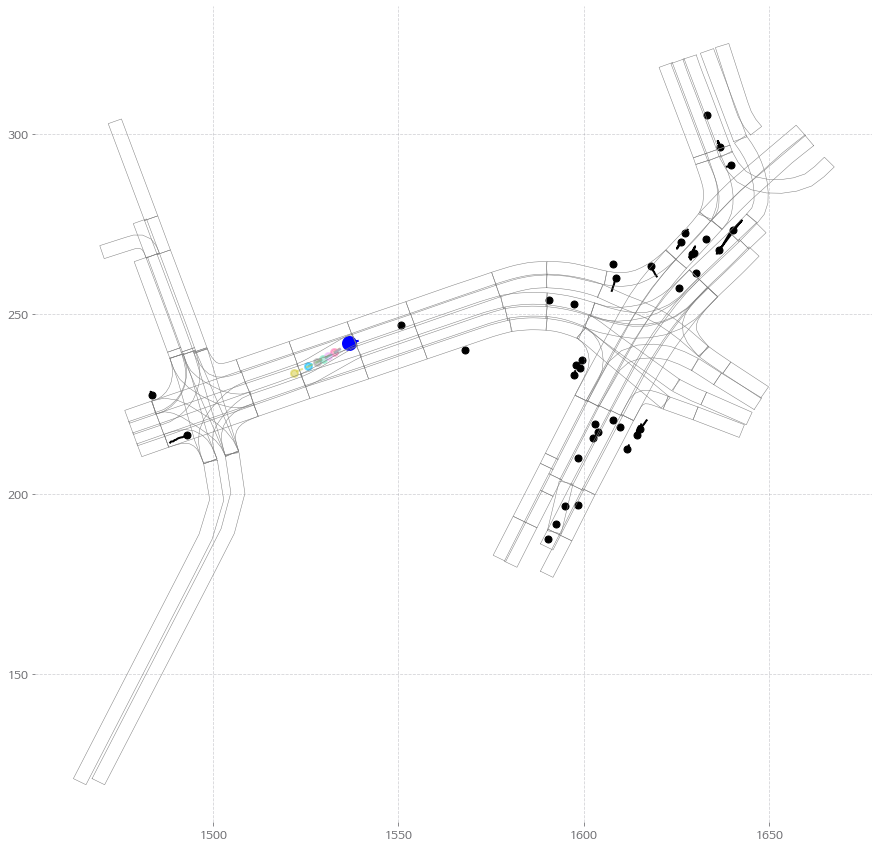

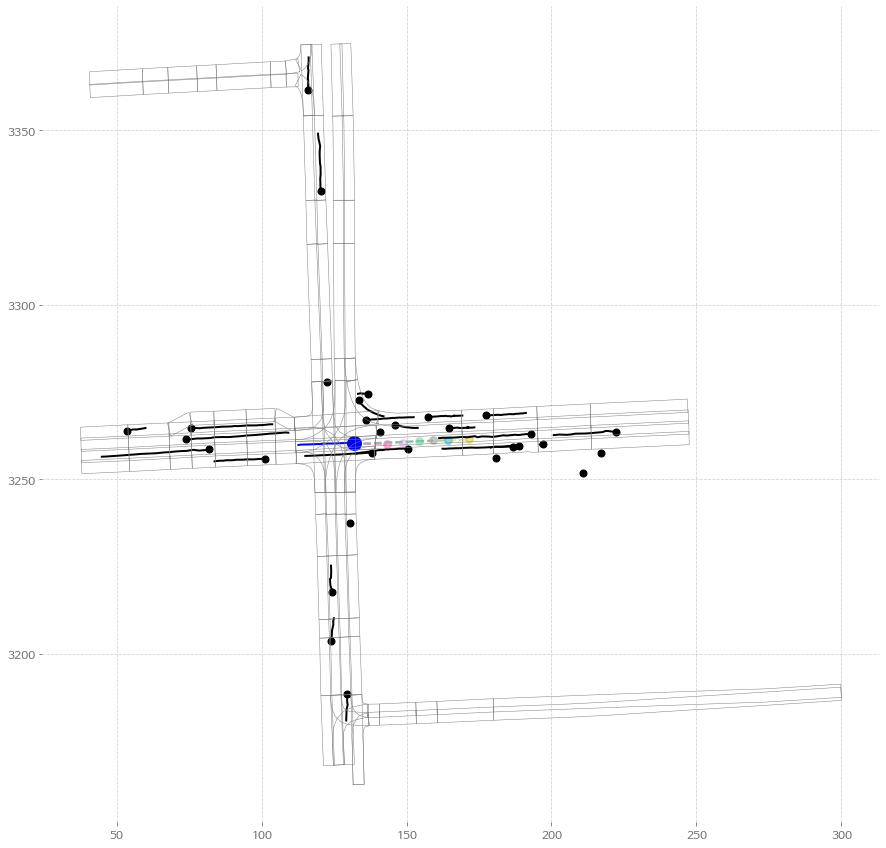

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


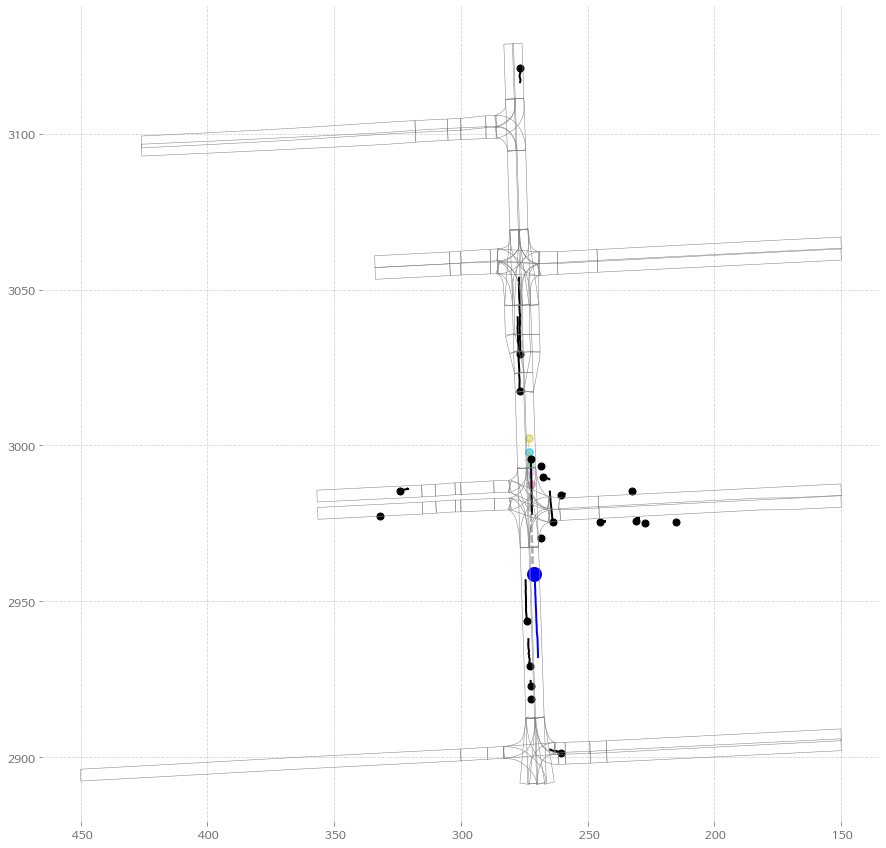

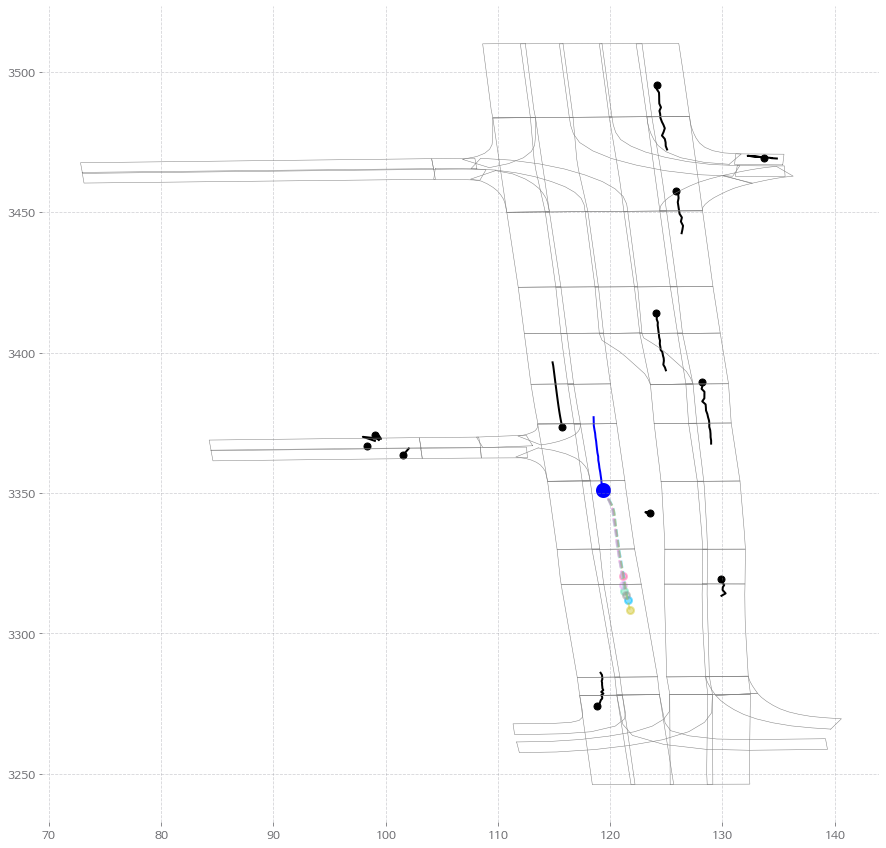

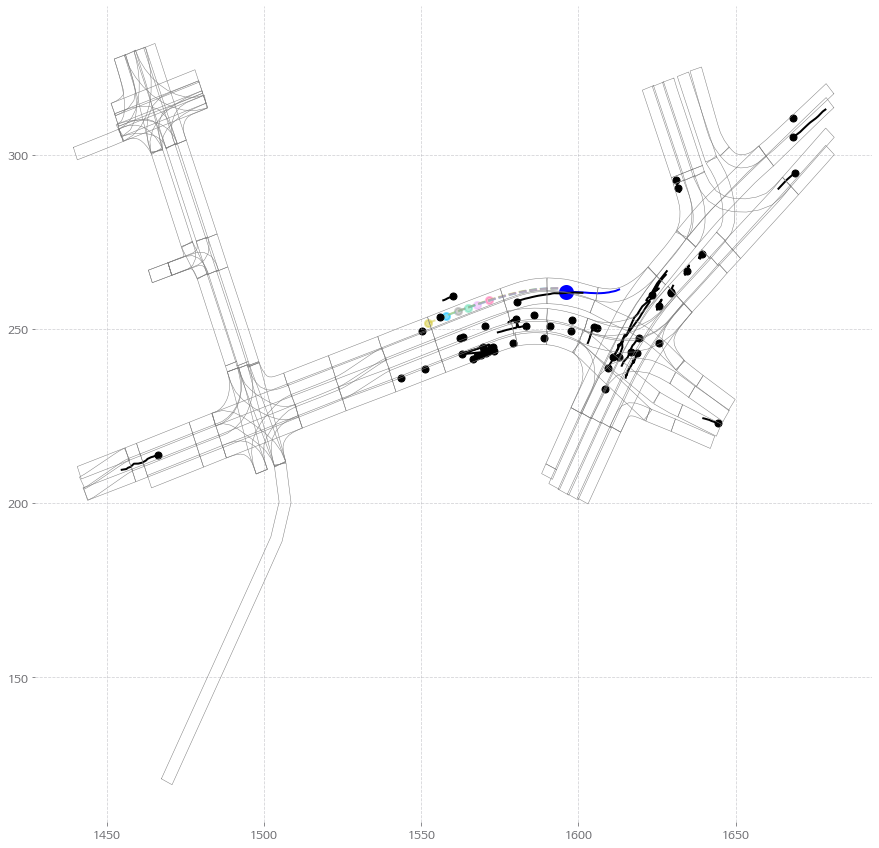

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


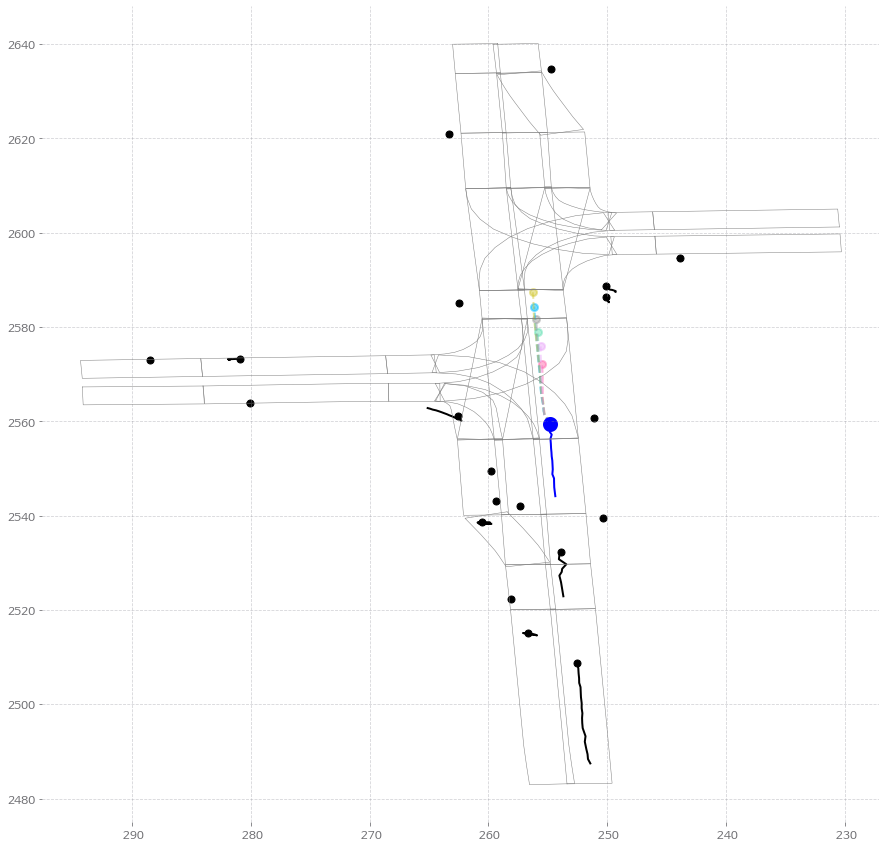

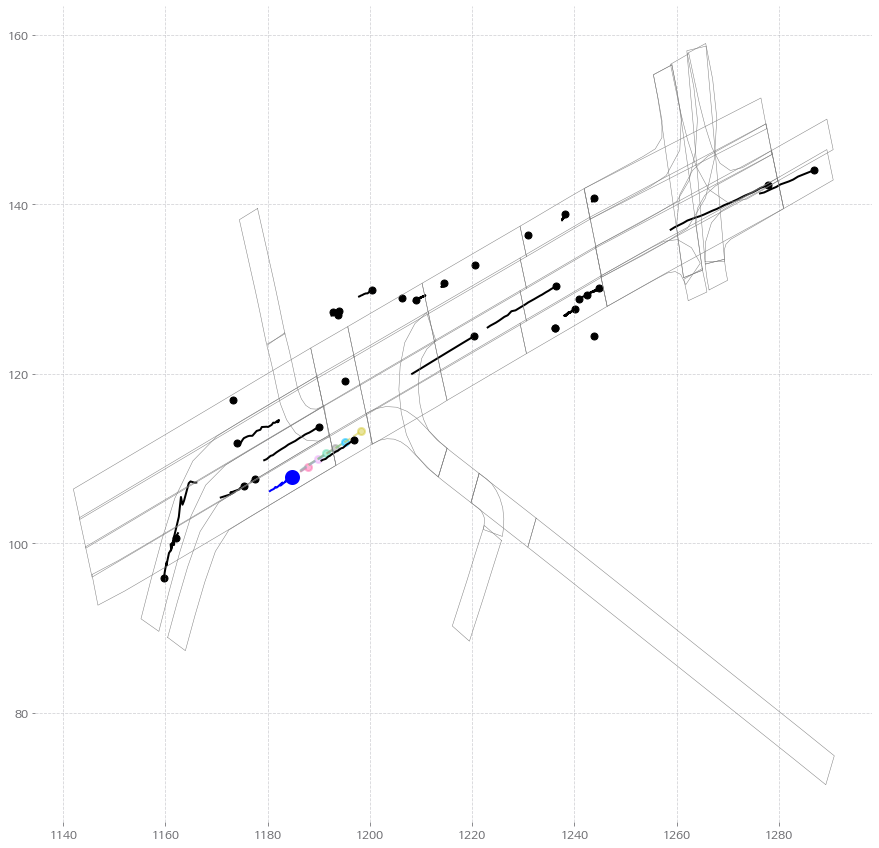

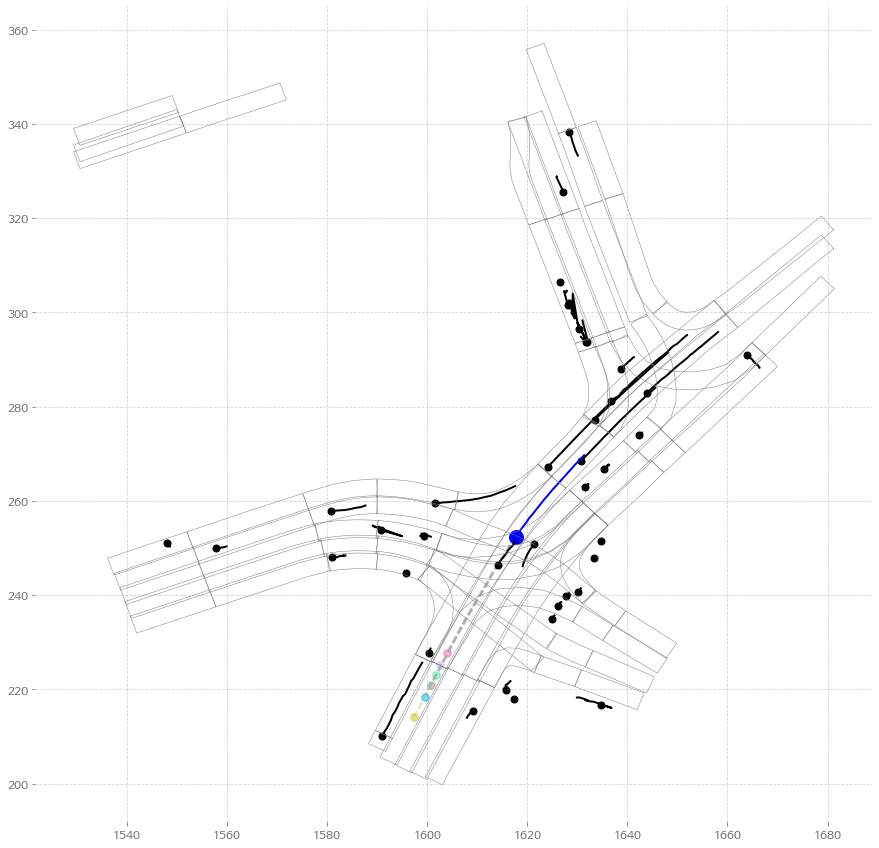

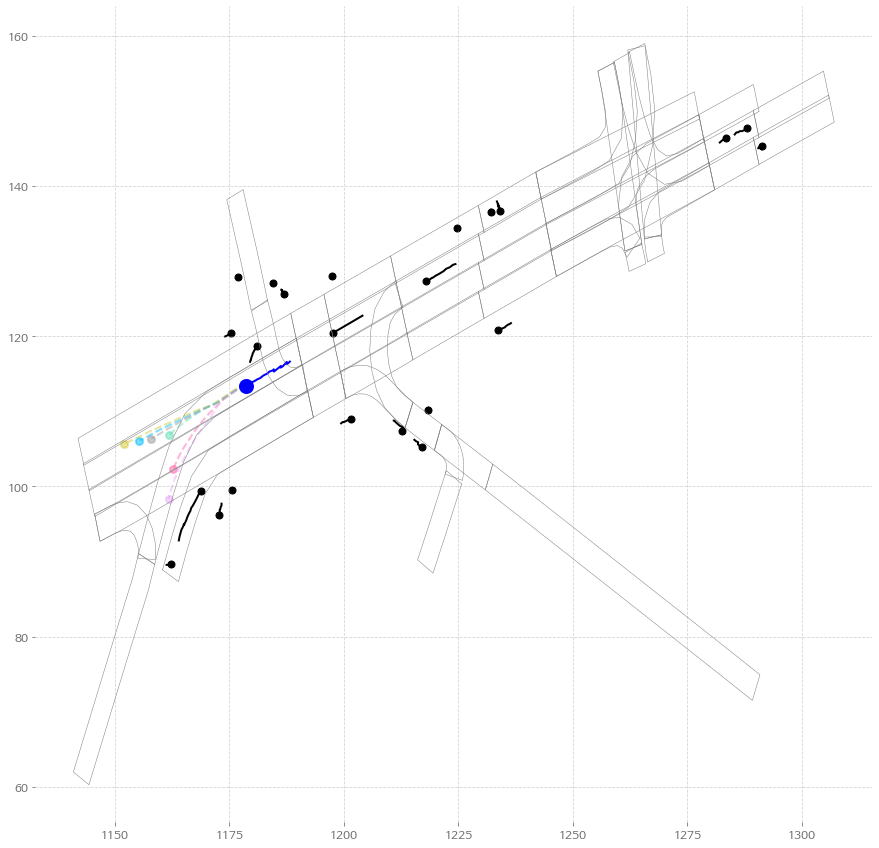

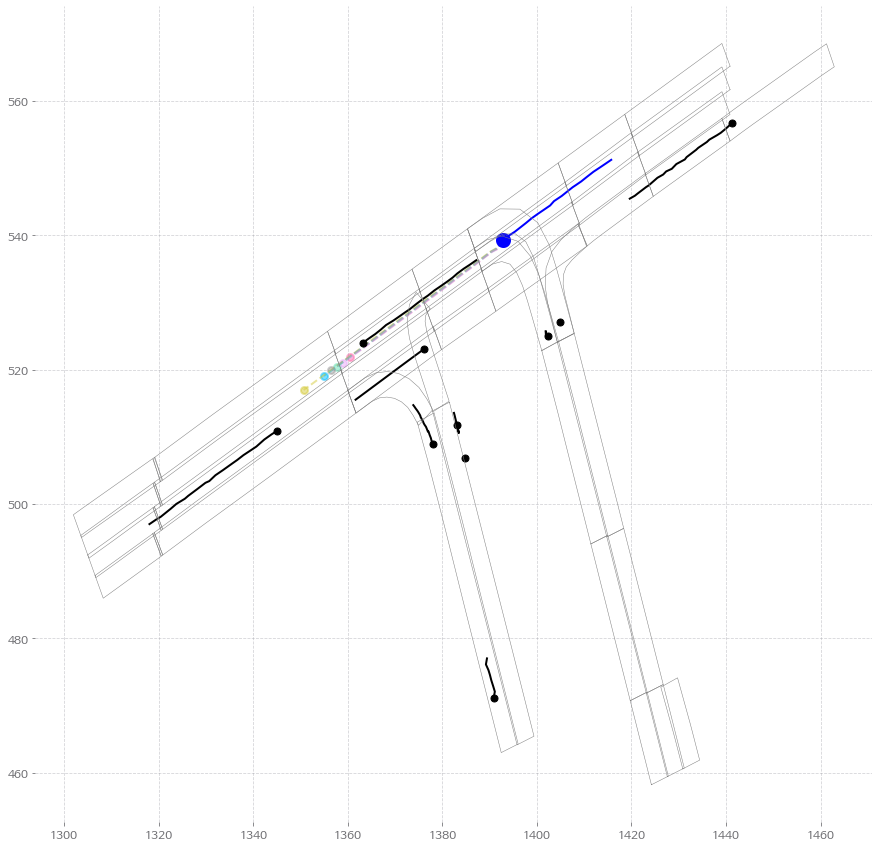

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


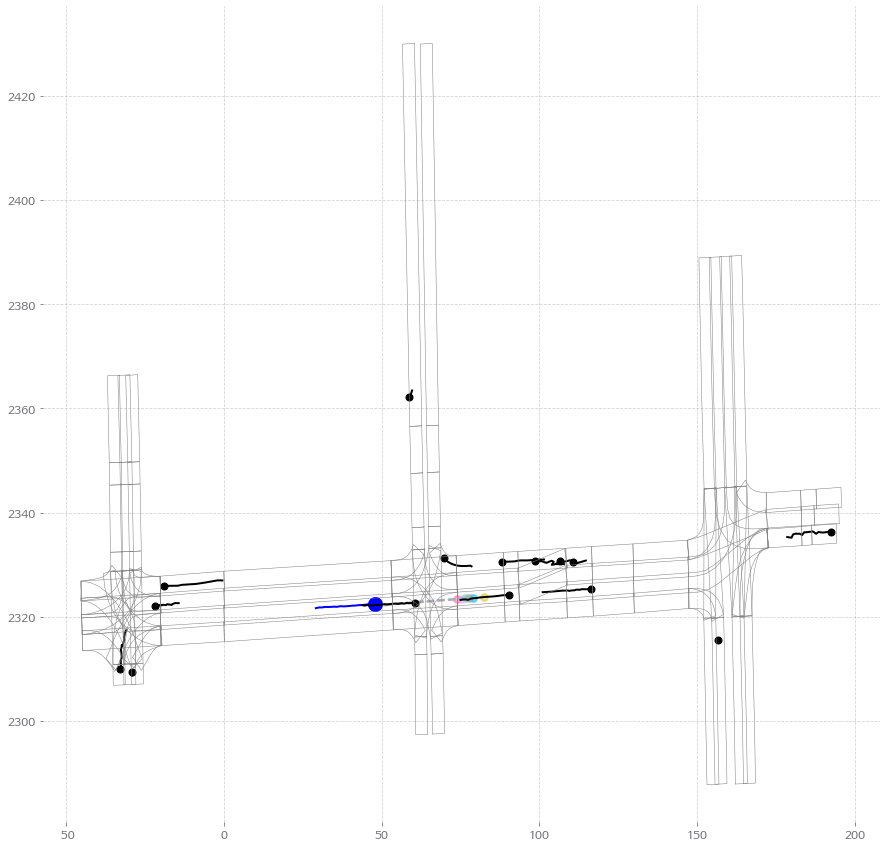

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


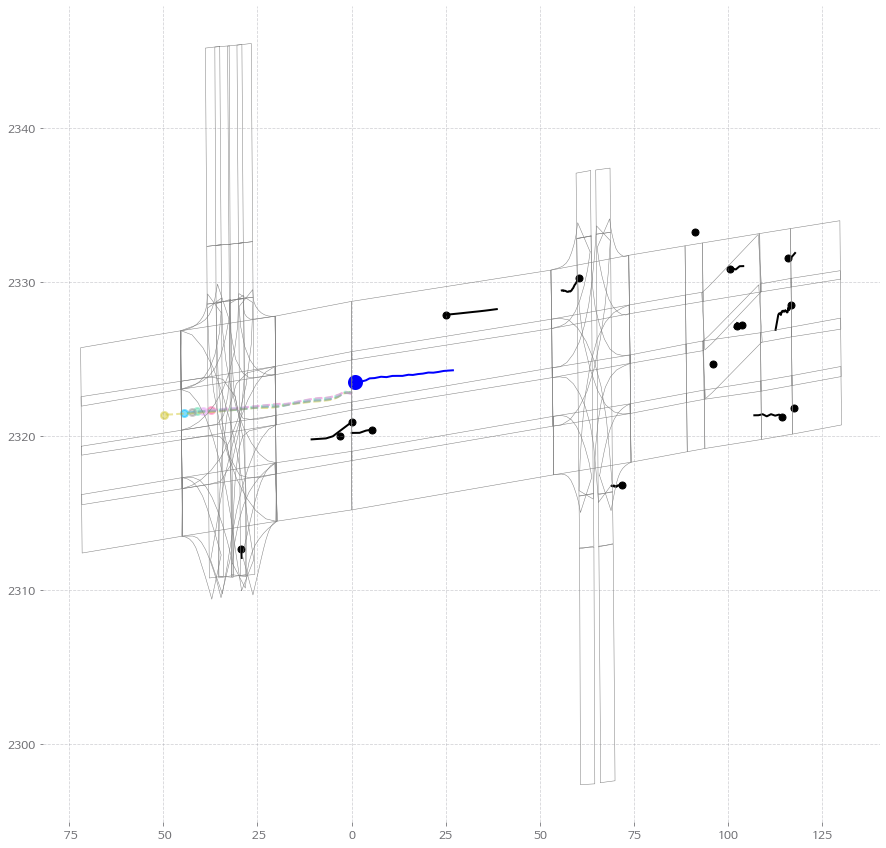

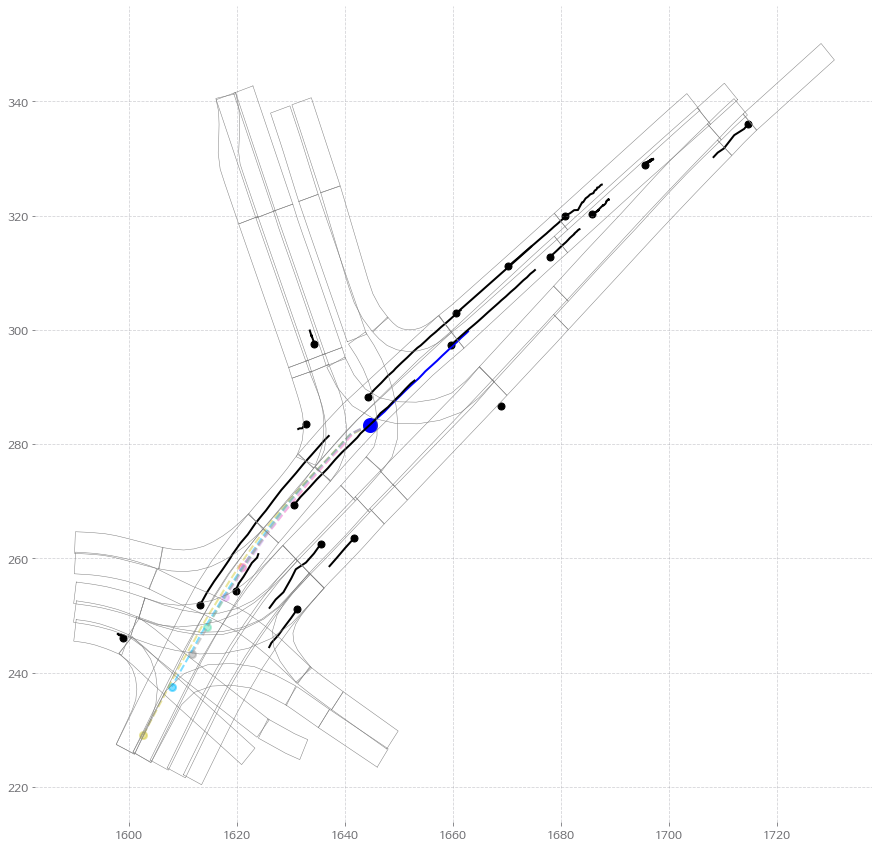

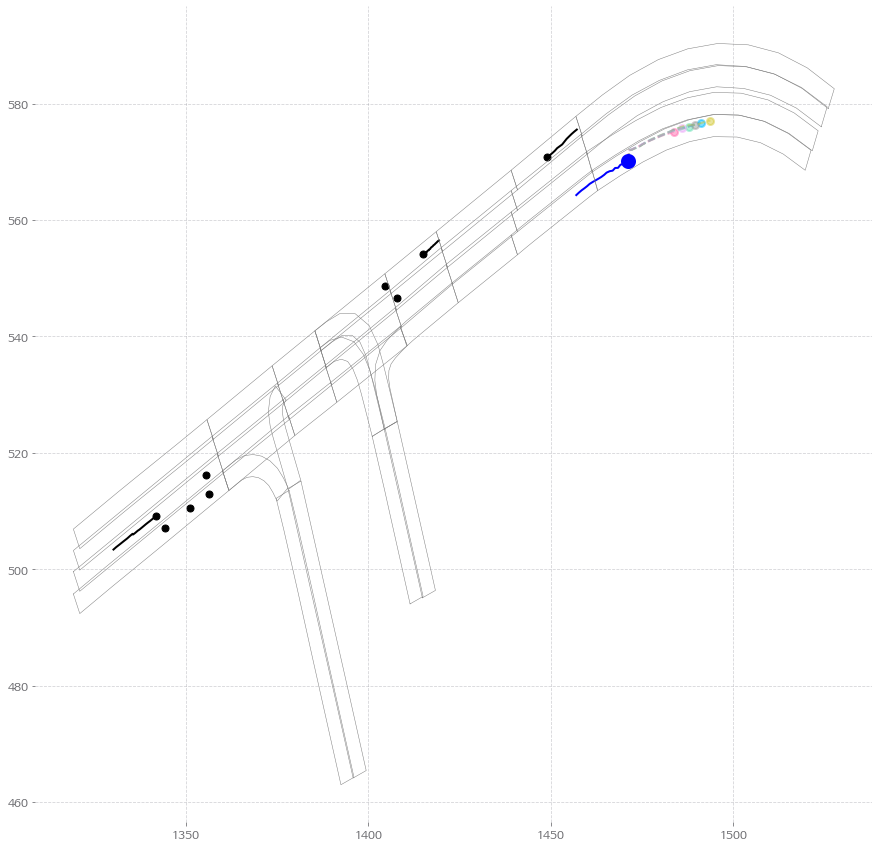

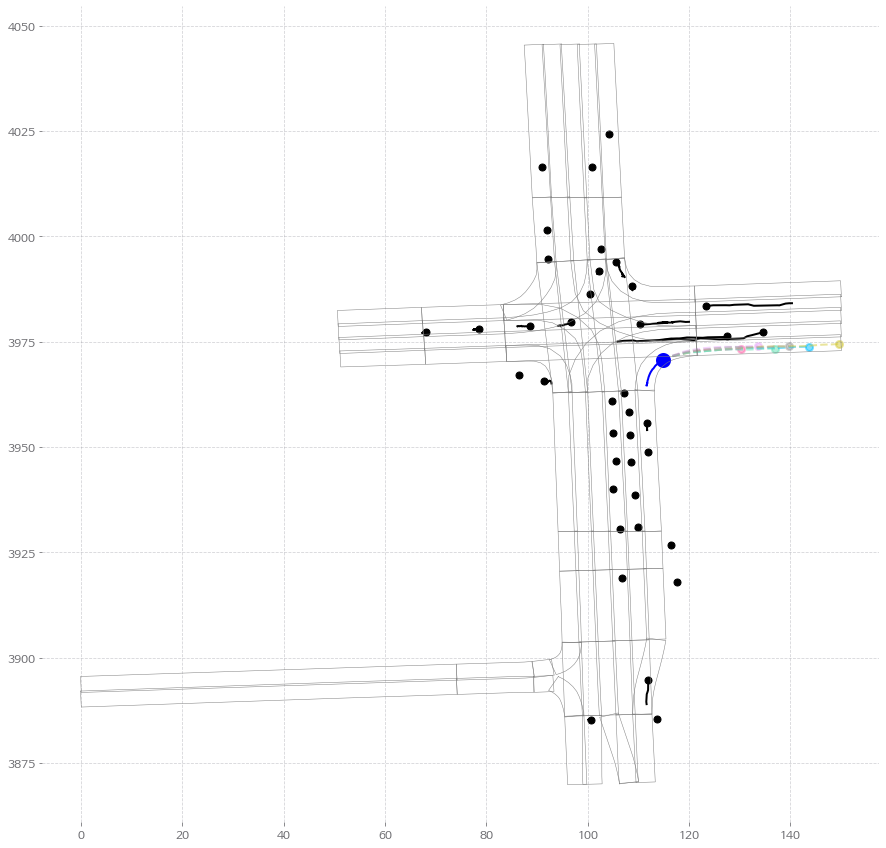

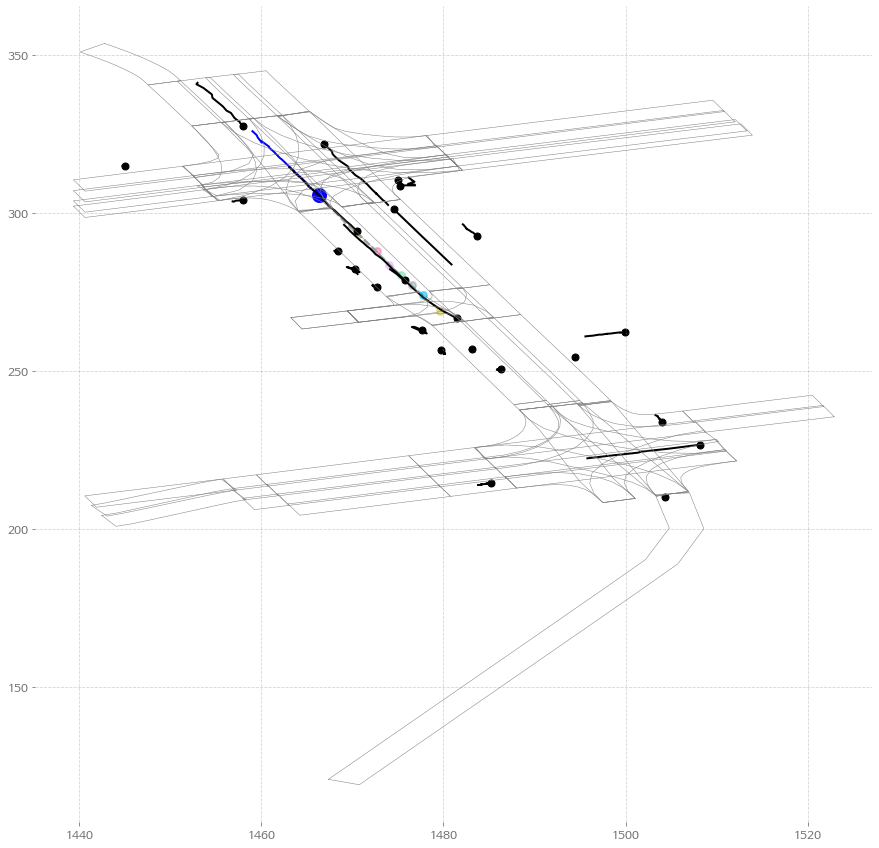

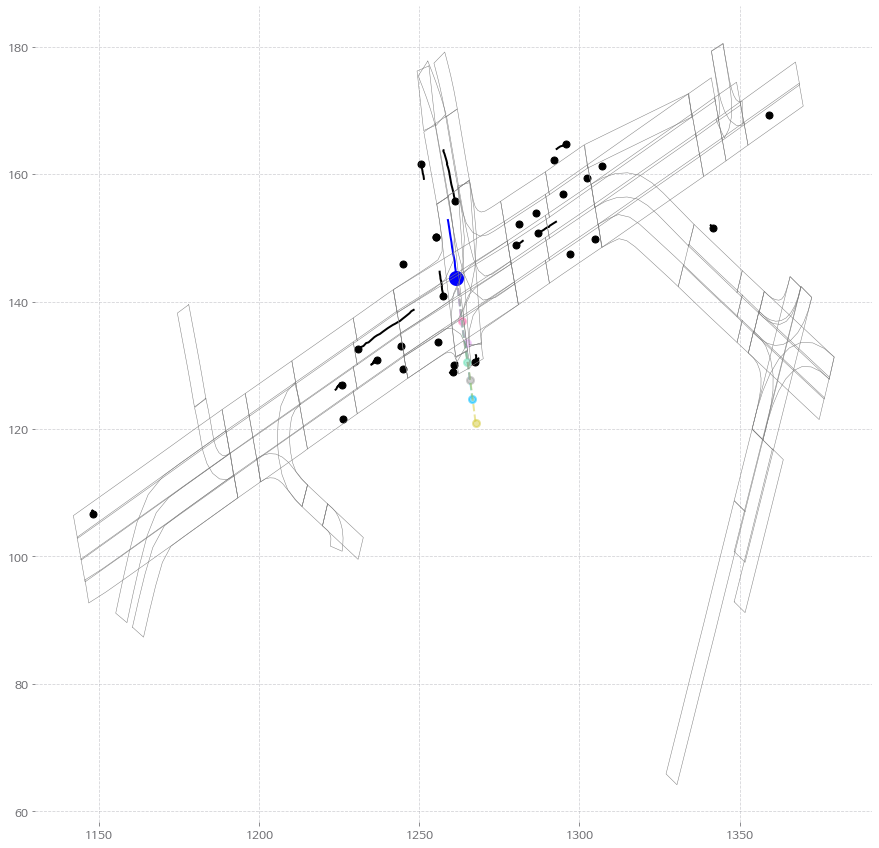

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


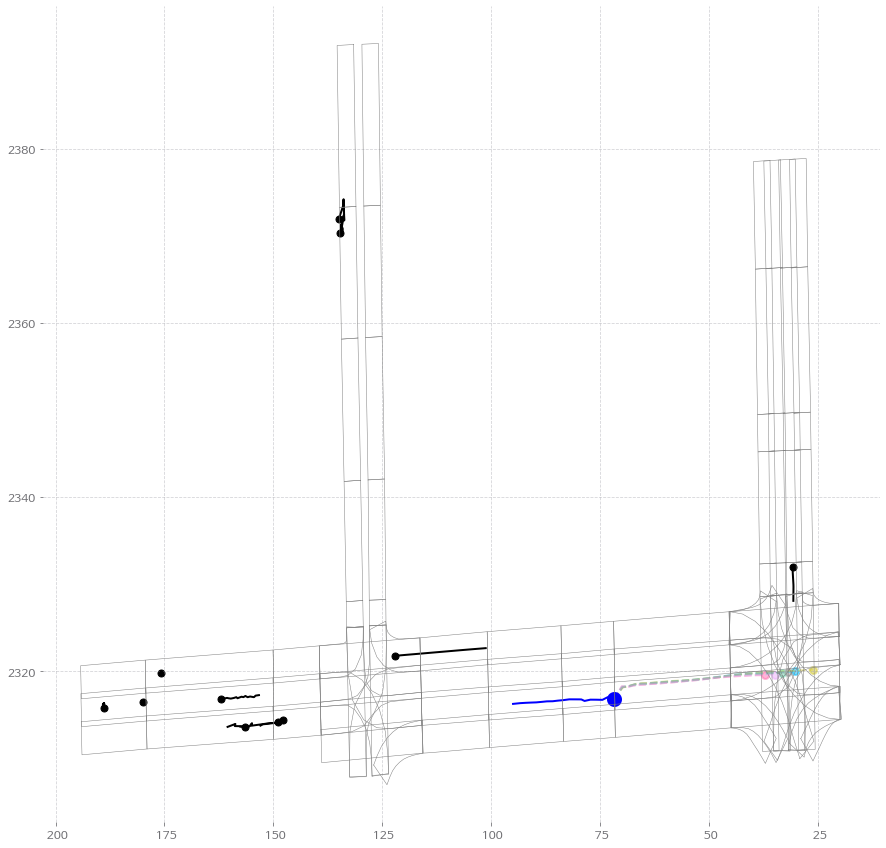

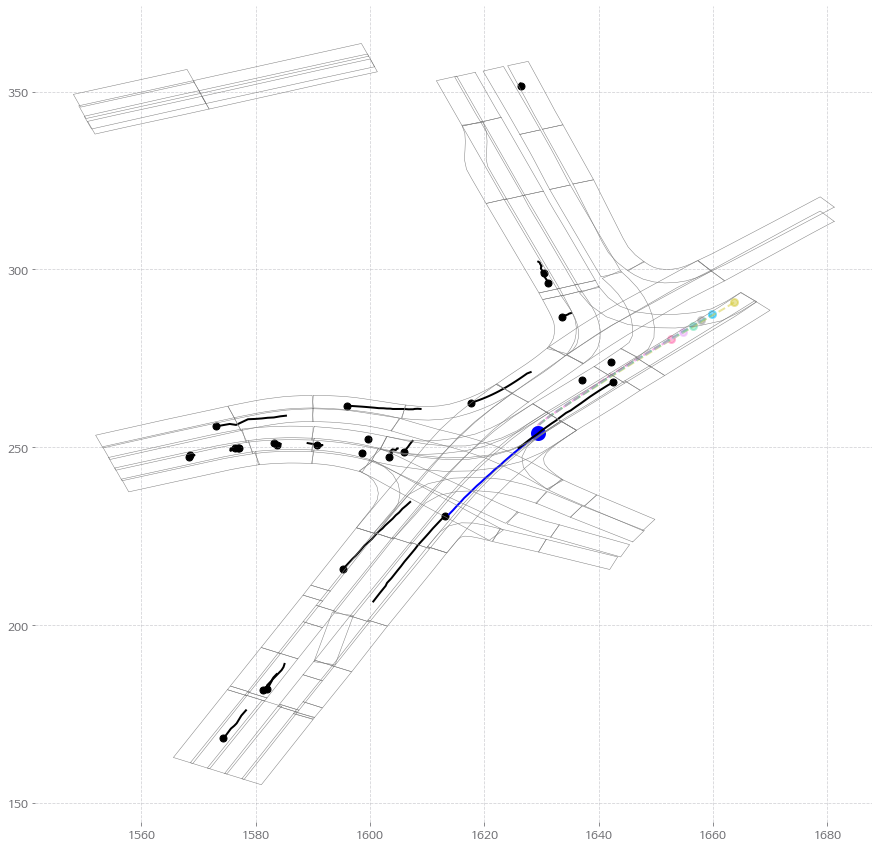

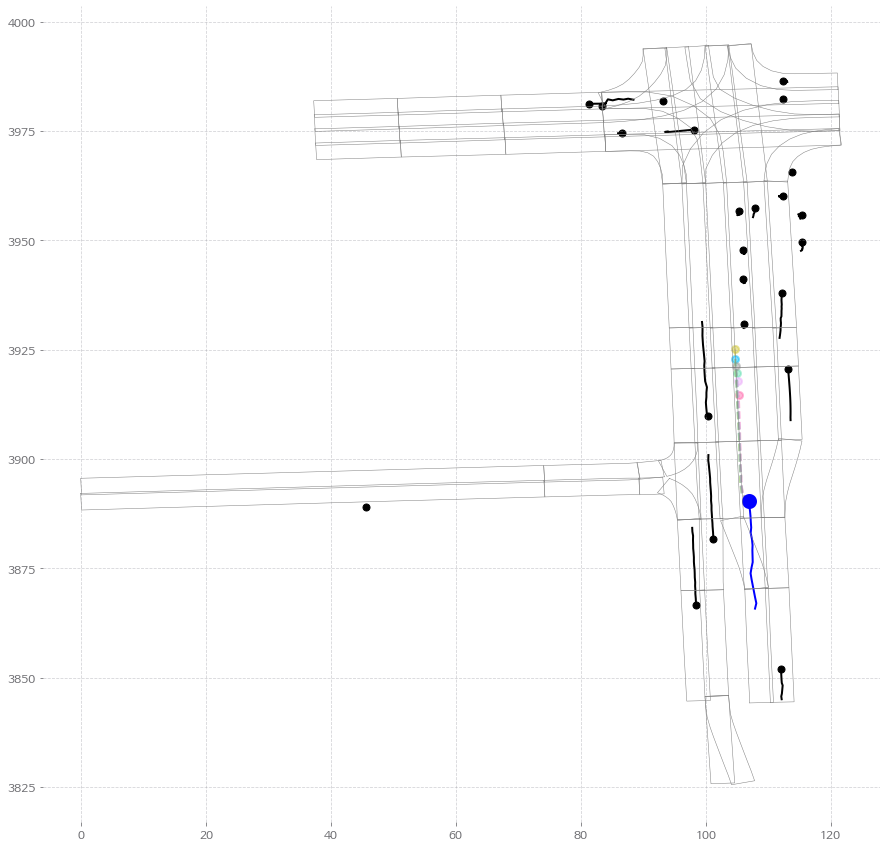

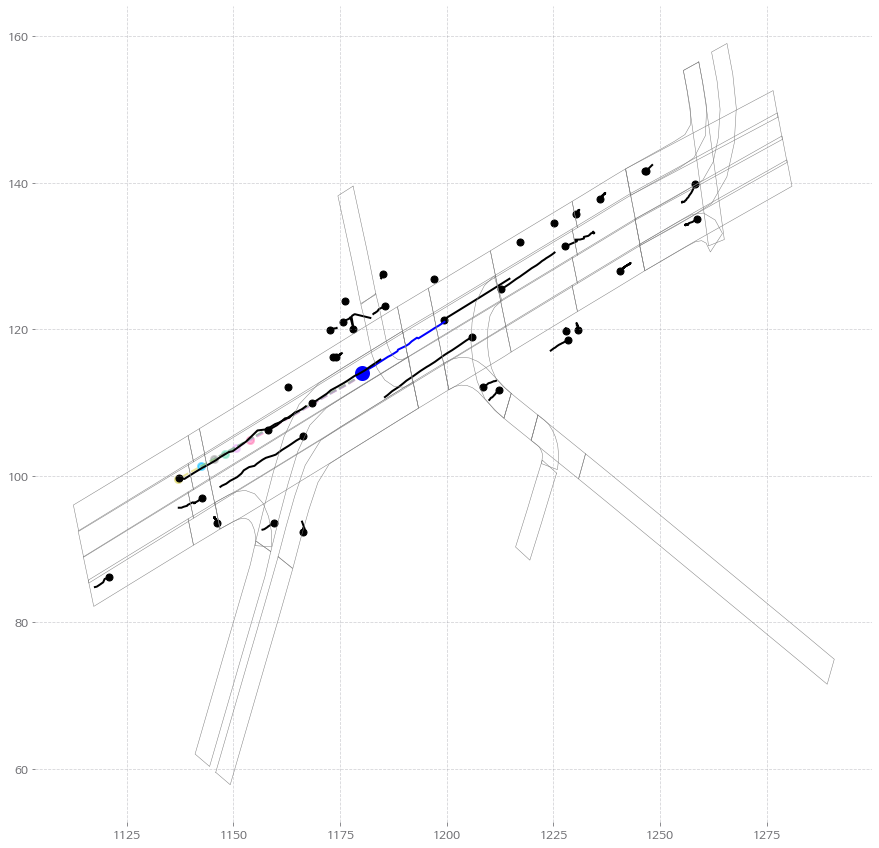

KeyboardInterrupt: 

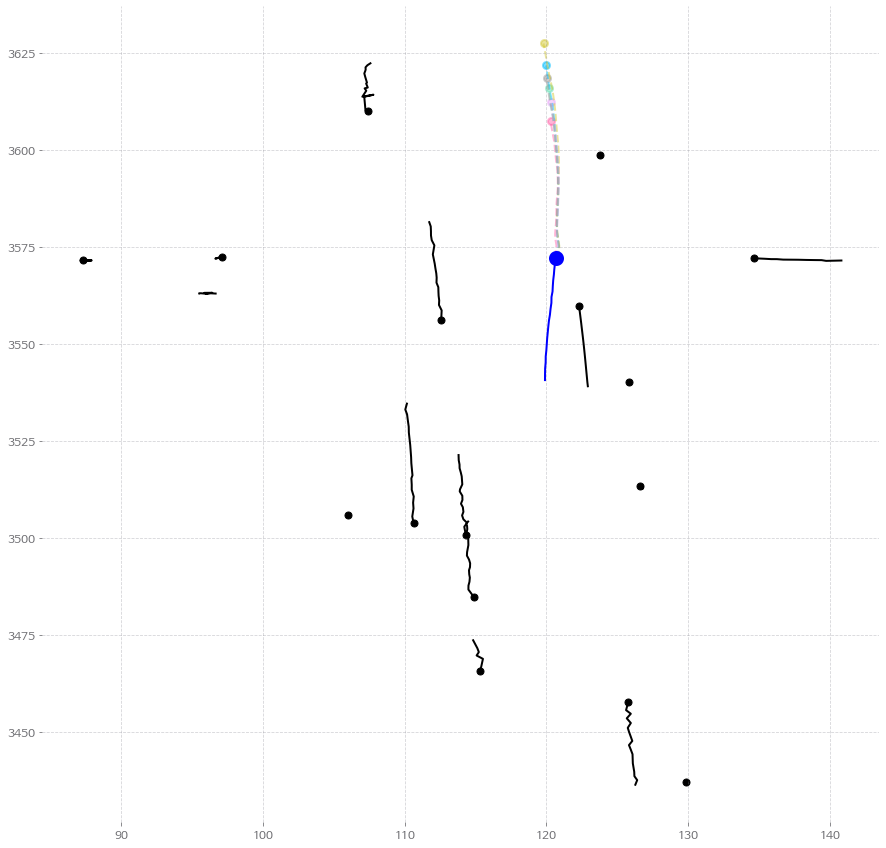

In [52]:
from tqdm.notebook import tqdm
import pickle 

root_dir = "ResultsFile/dist_0_01/"  # Test결과 파일이 있는 위치
raw_data_dir = "./../WIMP/data/argoverse_processed_simple/test/" #argoverse rawdata(csv 파일)이 저장되어 있는 위치



file_list = sorted(os.listdir(raw_data_dir), key=lambda a : str(a.split('.')[0]))

for index in tqdm(range(len(file_list))): # 전체를 다 그리기는 힘드므로 일부만 시각화

    json_dict = {}

    with open(raw_data_dir + file_list[index], 'rb') as json_data:
        pickle_dict = pickle.load(json_data)

    with open(root_dir + file_list[index].split(".")[0] + ".json", 'r') as json_data:
        json_dict = json.load(json_data)
        

        
    rt = -json_dict["rotation"]
    tx = -json_dict["translation"][0]
    ty = -json_dict["translation"][1]

    social_features = [d["XY_FEATURES"] for d in pickle_dict["SOCIAL"]]
    
    AVs = np.array([denormalization(np.array(d), rt, tx, ty) for d in social_features])
    AGENT = denormalization(np.array(pickle_dict["AGENT"]["XY_FEATURES"]), rt, tx, ty)
    city_name = json_dict["city"]
#     AV = np.array(AV)
#     AGENT = np.array(AGENT)

    
    for i in range(1):
        draw(AGENT, AVs, json_dict, figsize=(15,15), Normalize = True)


In [44]:
pickle_dict.keys()

dict_keys(['AGENT', 'SOCIAL', 'PATH', 'SEQ_ID', 'TRANSLATION', 'ROTATION', 'CITY_NAME'])

In [47]:
pickle_dict["SOCIAL"][0].keys()

dict_keys(['XY_FEATURES', 'HEURISTIC_ORACLE_CENTERLINE_NORMALIZED_PARTIAL', 'LABELS', 'TSTAMPS'])

In [27]:
json_dict.keys()

dict_keys(['preds', 'waypoint_preds', 'rotation', 'translation', 'csv_file', 'city', 'agent_labels'])